## Testing ControlNetLite

Goal: Build a more lightweight ControlNet for faster / easier training

Model Structure Comparison: 

![Nets](figs/nets.png)


Differences:
- ControlNet is Pretrained copied weights; ControlNetLite trained from scratch
- ControlNetLite injects into SD encoder instead of SD decoder
- ControlNet ~ 8.5 GB, ControlNetLite ~ 5.7 GB (2/3 the size)
- ControlNet 361M params, ControlNetLite 127M params 


Training Scheme:
- ControlNetLite trained on same original dataset (just vocal melody generation) for 9 hours.
- Went through 17 epochs of data in 9 hr; ControlNet took 12 hr for 10 epochs. So much faster to train.

## Code:

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import os
import IPython

# make function to display all audios and specgrams
def get_audios(root, prompt, 
               methods = ["cnet", "cnetlite"]):
    
    print("-------------------------------------")
    print("-------------------------------------")
    print(f"Prompt: {prompt}")
    print("-------------------------------------")
    print("Target audio: ")
    IPython.display.display(IPython.display.Audio(os.path.join(root, "cnet", prompt+"_target.wav")))

    for method in methods: 
        try:
            folder = os.path.join(root, method)

            print(f"{method} Sample 0: ")
            IPython.display.display(IPython.display.Audio(os.path.join(folder, prompt+"_samp_0.wav")))
            print(f"{method} Sample 1: ")
            IPython.display.display(IPython.display.Audio(os.path.join(folder, prompt+"_samp_1.wav")))
        except:
            print(f"no sample for {method}")
    print("\n\n")

def get_sample_specs(root, prompt, 
               methods = ["cnet", "cnetlite"]):
        
    fig, axs = plt.subplots(len(methods), 3, figsize=(12,7))
    axs = np.ravel(axs)
    for i in range(len(methods)):
        # draw control
        axs[i*3].axis('off')
        axs[i*3].imshow(cv2.imread(os.path.join(root, methods[i], prompt+"_source.png")))
        axs[i*3].set_title(f"{methods[i]} - control")

        # draw sample
        axs[i*3+1].axis('off')
        axs[i*3+1].imshow(cv2.imread(os.path.join(root, methods[i], prompt+"_samp_0.png")))
        axs[i*3+1].set_title(f"{methods[i]} - sample")

        axs[i*3+2].axis('off')
        axs[i*3+2].imshow(cv2.imread(os.path.join(root, methods[i], prompt+"_target.png")))
        axs[i*3+2].set_title(f"{methods[i]} - target")

    plt.suptitle(f"Prompt: \"{prompt}\"")
    plt.tight_layout()
    plt.show()

## Testing Out: ControlNet Preserves Background while ControlNetLite does not

In [6]:
root = "../experiment_samples/"
methods = ["cnet", "cnetlite"]

files = os.listdir(root+"/cnet")
prompts = list(set([file.split(".")[0]+"." for file in files]))
prompts

['Generate a male vocal rock melody with sustained notes.',
 'Generate a female pop melody that sounds like Britney Spears singing Baby One More Time.',
 'Generate an airy and sparse female vocal pop melody.',
 'Generate an uplifting female vocal pop melody.',
 'Generate a female vocal melody in the style of Britney Spears.',
 'Generate a female vocal pop melody.',
 'Generate a groovy smooth female vocal pop chorus.',
 'Generate an up-tempo female vocal rock melody.',
 'Generate a deep male vocal rock melody.',
 'Generate a soft male vocal rock melody.']

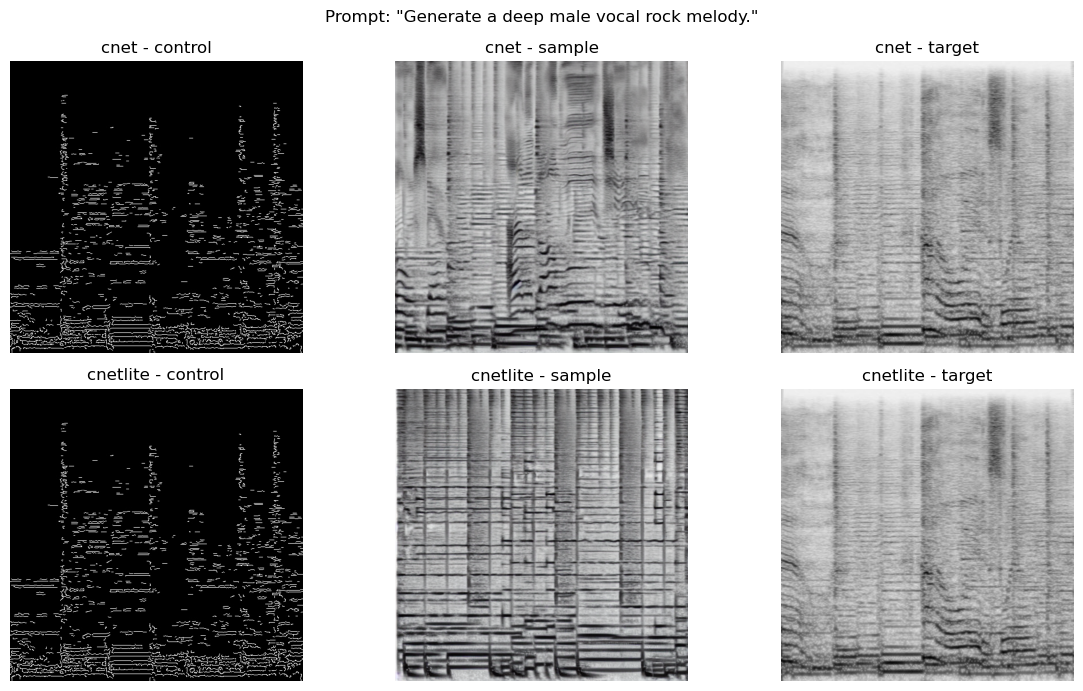

-------------------------------------
-------------------------------------
Prompt: Generate a deep male vocal rock melody.
-------------------------------------
Target audio: 


cnet Sample 0: 


cnet Sample 1: 


cnetlite Sample 0: 


cnetlite Sample 1: 


In [16]:
prompt = 'Generate a deep male vocal rock melody.'
get_sample_specs(root, prompt, methods=methods)
get_audios(root, prompt, methods=methods)